In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df = pd.read_csv('data.csv');

In [ ]:
df.head()

,class_name,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class_name          1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [ ]:
df.isnull().sum()

,0
class_name,0
tempo,0
beats,0
chroma_stft,0
rmse,0
spectral_centroid,0
spectral_bandwidth,0
rolloff,0
zero_crossing_rate,0
mfcc1,0


In [ ]:
df.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


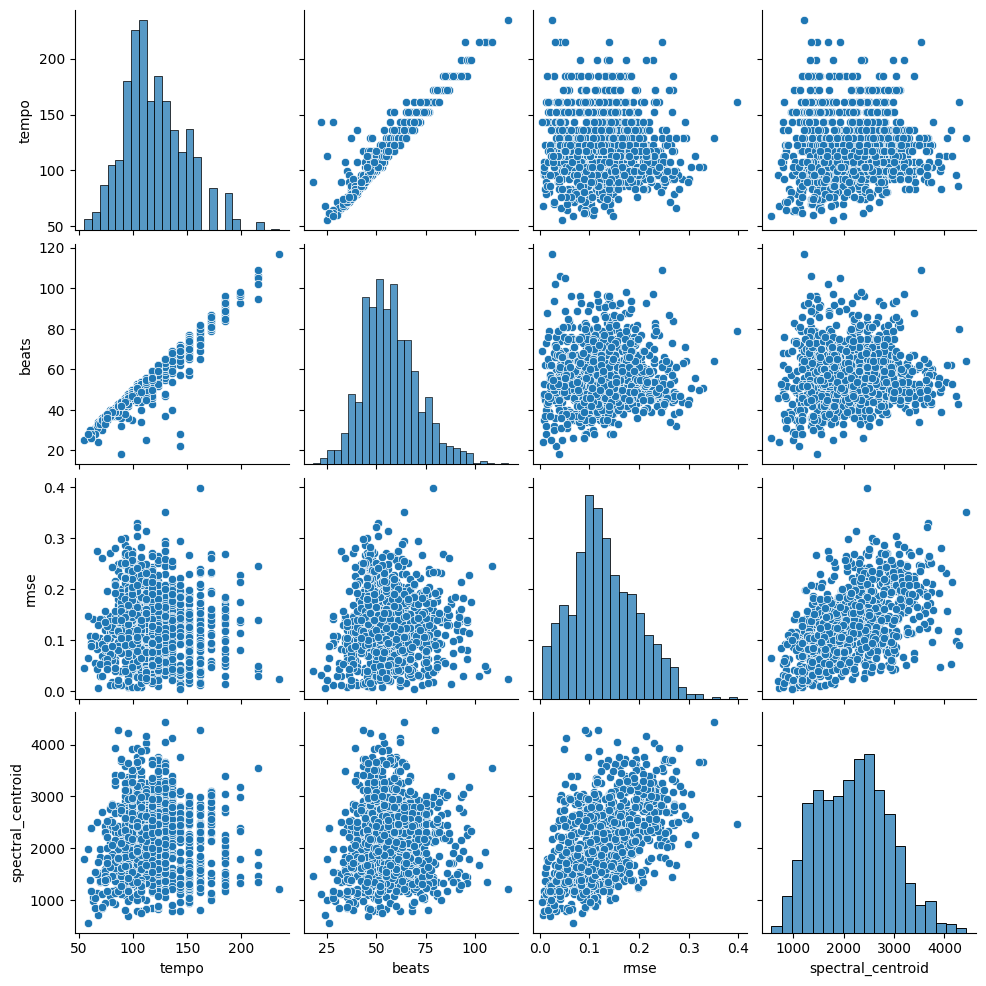

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['tempo', 'beats', 'rmse', 'spectral_centroid', 'label']])
plt.show()


In [ ]:
df.drop_duplicates(inplace=True)
df.head(3)

,class_name,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues


In [ ]:
from sklearn.preprocessing import StandardScaler
continuous_features = ['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate']
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [ ]:
label_mapping = dict(zip(df['label'].unique(), encoder.inverse_transform(df['label'].unique())))
for encoded_label, genre in label_mapping.items():
  print(f"Encoded Label: {encoded_label}, Music Genre: {genre}")

Encoded Label: 0, Music Genre: blues
Encoded Label: 1, Music Genre: classical
Encoded Label: 2, Music Genre: country
Encoded Label: 3, Music Genre: disco
Encoded Label: 4, Music Genre: hiphop
Encoded Label: 5, Music Genre: jazz
Encoded Label: 6, Music Genre: metal
Encoded Label: 7, Music Genre: pop
Encoded Label: 8, Music Genre: reggae
Encoded Label: 9, Music Genre: rock


In [ ]:
df.head(3)

,class_name,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,-0.575322,-0.502331,0.029416,1.788197,-0.108999,-0.537698,-0.230836,0.579098,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,0
1,blues,-0.846176,-0.924828,-0.872903,-0.263405,-1.451127,-1.409455,-1.516632,-1.067127,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,0
2,blues,1.145399,1.258075,-1.520385,0.316447,-1.206686,-0.505345,-1.053275,-1.442272,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,0


In [ ]:
df = df.drop('class_name', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Models


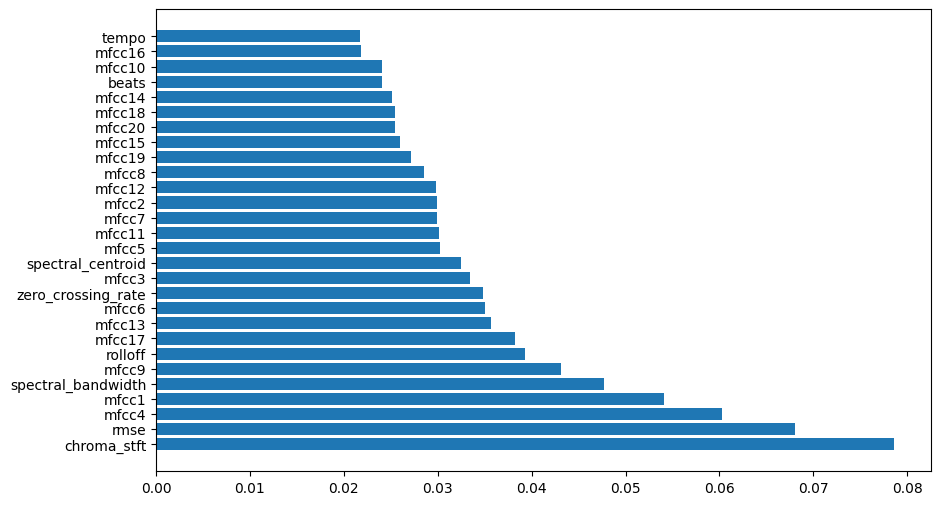

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), X.columns[indices])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.6060606060606061
              precision    recall  f1-score   support

           0       0.61      0.67      0.64        21
           1       0.81      0.93      0.87        14
           2       0.43      0.57      0.49        23
           3       0.62      0.42      0.50        24
           4       0.63      0.60      0.62        20
           5       0.70      0.73      0.71        22
           6       0.73      1.00      0.84        19
           7       0.56      0.71      0.62        14
           8       0.53      0.43      0.47        21
           9       0.40      0.20      0.27        20

    accuracy                           0.61       198
   macro avg       0.60      0.62      0.60       198
weighted avg       0.60      0.61      0.59       198



In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')


Cross-validation scores: [0.65151515 0.65151515 0.65482234 0.69543147 0.63959391]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 10, 'n_estimators': 200}


In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6060606060606061
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.67        21
           1       0.82      1.00      0.90        14
           2       0.48      0.52      0.50        23
           3       0.75      0.38      0.50        24
           4       0.52      0.55      0.54        20
           5       0.65      0.68      0.67        22
           6       0.73      1.00      0.84        19
           7       0.56      0.71      0.62        14
           8       0.53      0.48      0.50        21
           9       0.38      0.25      0.30        20

    accuracy                           0.61       198
   macro avg       0.61      0.63      0.60       198
weighted avg       0.60      0.61      0.59       198



In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_output)

Accuracy: 0.49
Confusion Matrix:
 [[10  1  2  2  0  1  1  0  2  2]
 [ 0 13  0  0  0  0  0  1  0  0]
 [ 4  1  5  1  3  4  0  1  3  1]
 [ 0  0  0 10  3  0  1  3  1  6]
 [ 1  0  1  3  8  0  2  1  3  1]
 [ 2  1  2  2  0 13  0  0  1  1]
 [ 1  1  0  1  1  0 14  0  1  0]
 [ 0  1  0  1  4  0  0  8  0  0]
 [ 3  1  2  0  3  3  0  0  8  1]
 [ 1  1  3  2  1  2  1  0  1  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.48      0.47        21
           1       0.65      0.93      0.76        14
           2       0.33      0.22      0.26        23
           3       0.45      0.42      0.43        24
           4       0.35      0.40      0.37        20
           5       0.57      0.59      0.58        22
           6       0.74      0.74      0.74        19
           7       0.57      0.57      0.57        14
           8       0.40      0.38      0.39        21
           9       0.40      0.40      0.40        20

    accuracy   

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_output)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:48:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.62
Confusion Matrix:
 [[12  0  2  1  0  2  2  0  2  0]
 [ 1 13  0  0  0  0  0  0  0  0]
 [ 0  1 14  0  1  3  0  0  1  3]
 [ 0  0  2  9  2  0  0  3  2  6]
 [ 1  0  2  2 10  0  2  1  2  0]
 [ 1  3  1  0  0 14  0  0  1  2]
 [ 0  0  0  0  0  0 18  0  0  1]
 [ 0  0  0  0  0  0  0 11  2  1]
 [ 1  0  4  0  0  1  1  0 13  1]
 [ 2  0  3  2  0  2  2  0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62        21
           1       0.76      0.93      0.84        14
           2       0.50      0.61      0.55        23
           3       0.64      0.38      0.47        24
           4       0.77      0.50      0.61        20
           5       0.64      0.64      0.64        22
           6       0.72      0.95      0.82        19
           7       0.73      0.79      0.76        14
           8       0.57      0.62      0.59        21
           9       0.39      0.45      0.42        20

    accuracy   

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.64
Confusion Matrix:
[[13  0  3  0  0  1  2  0  1  1]
 [ 0 13  0  0  0  1  0  0  0  0]
 [ 1  0 14  0  1  2  0  0  2  3]
 [ 0  0  0 13  3  0  1  1  2  4]
 [ 1  0  0  1 13  0  2  2  1  0]
 [ 0  5  2  0  0 14  0  0  0  1]
 [ 0  0  0  0  0  0 19  0  0  0]
 [ 0  0  1  2  2  0  0  8  1  0]
 [ 1  1  2  1  3  0  0  0 11  2]
 [ 3  0  3  1  0  1  2  1  0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        21
           1       0.68      0.93      0.79        14
           2       0.56      0.61      0.58        23
           3       0.72      0.54      0.62        24
           4       0.59      0.65      0.62        20
           5       0.74      0.64      0.68        22
           6       0.73      1.00      0.84        19
           7       0.67      0.57      0.62        14
           8       0.61      0.52      0.56        21
           9       0.45      0.45      0.45        20

    accur

In [ ]:
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.57
Confusion Matrix:
[[14  0  4  1  0  0  0  0  1  1]
 [ 0 13  0  0  0  1  0  0  0  0]
 [ 1  1 15  0  0  2  0  0  1  3]
 [ 0  0  3 11  0  1  0  3  3  3]
 [ 0  0  3  3 10  0  0  2  1  1]
 [ 2  7  1  1  0  9  0  0  1  1]
 [ 0  0  0  0  2  0 17  0  0  0]
 [ 0  1  0  1  3  0  0  8  0  1]
 [ 1  1  3  2  2  0  0  2  8  2]
 [ 0  1  3  4  0  1  1  2  0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        21
           1       0.54      0.93      0.68        14
           2       0.47      0.65      0.55        23
           3       0.48      0.46      0.47        24
           4       0.59      0.50      0.54        20
           5       0.64      0.41      0.50        22
           6       0.94      0.89      0.92        19
           7       0.47      0.57      0.52        14
           8       0.53      0.38      0.44        21
           9       0.40      0.40      0.40        20

    accur

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.40
Confusion Matrix:
[[ 4  2  3  1  0  5  6  0  0  0]
 [ 0 10  1  0  0  2  0  0  0  1]
 [ 2  3  8  0  0  2  1  4  1  2]
 [ 1  0  1  4  1  0  4 10  2  1]
 [ 0  0  0  1  6  0  5  4  3  1]
 [ 3  9  0  0  1  5  0  1  2  1]
 [ 0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  1  0 11  2  0]
 [ 1  1  1  1  2  3  0  1 11  0]
 [ 2  0  5  1  0  1  6  2  1  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.19      0.24        21
           1       0.40      0.71      0.51        14
           2       0.42      0.35      0.38        23
           3       0.50      0.17      0.25        24
           4       0.60      0.30      0.40        20
           5       0.26      0.23      0.24        22
           6       0.46      1.00      0.63        19
           7       0.33      0.79      0.47        14
           8       0.50      0.52      0.51        21
           9       0.25      0.10      0.14        20

    accur

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2275 - loss: 2.1250
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4240 - loss: 1.6566  
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5107 - loss: 1.4349 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5676 - loss: 1.2587 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6077 - loss: 1.1501 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6607 - loss: 1.0530
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6925 - loss: 0.9797
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7045 - loss: 0.9173
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7424 - loss: 0.8704
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7549 - loss: 0.8097
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7547 - loss: 0.7755
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7776

In [ ]:

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"\nAccuracy Score: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Accuracy Score: 0.65
Confusion Matrix:
[[15  0  0  1  0  1  2  0  1  1]
 [ 1 10  0  0  0  2  0  0  1  0]
 [ 1  0 15  0  1  3  0  0  1  2]
 [ 0  0  0 13  1  1  1  1  3  4]
 [ 0  0  1  2 11  0  1  2  2  1]
 [ 0  4  0  0  0 16  0  0  0  2]
 [ 0  0  0  0  0  0 19  0  0  0]
 [ 0  1  0  0  3  0  0  7  2  1]
 [ 0  1  1  1  2  1  0  1 12  2]
 [ 1  0  2  1  0  2  0  3  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.62      0.71      0.67        14
           2       0.79      0.65      0.71        23
           3       0.72      0.54      0.62        24
           4       0.61      0.55      0.58        20
           5       0.62      0.73      0.67        22
           6       0.83      1.00      0.90        19
           7       0.50      0.50      0.50        14
           8       0.52      0.57      0.55        21
           9       0.43      0.50      0.47        20

    accur